In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer 

import warnings
warnings.filterwarnings("ignore")

In [2]:
tnc_df = pd.read_csv("train.csv")
tnc_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
tnc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
round((tnc_df.isnull().sum()/len(tnc_df.index))*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [5]:
# Fillinig the null values of 'Age', 'Cabin', 'Embarked' attributes
imputer = SimpleImputer(strategy='most_frequent')
tnc_df[['Age','Cabin','Embarked']] = imputer.fit_transform(tnc_df[['Age','Cabin','Embarked']])

In [6]:
tnc_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [7]:
# Summary statistics of the dataset
tnc_df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


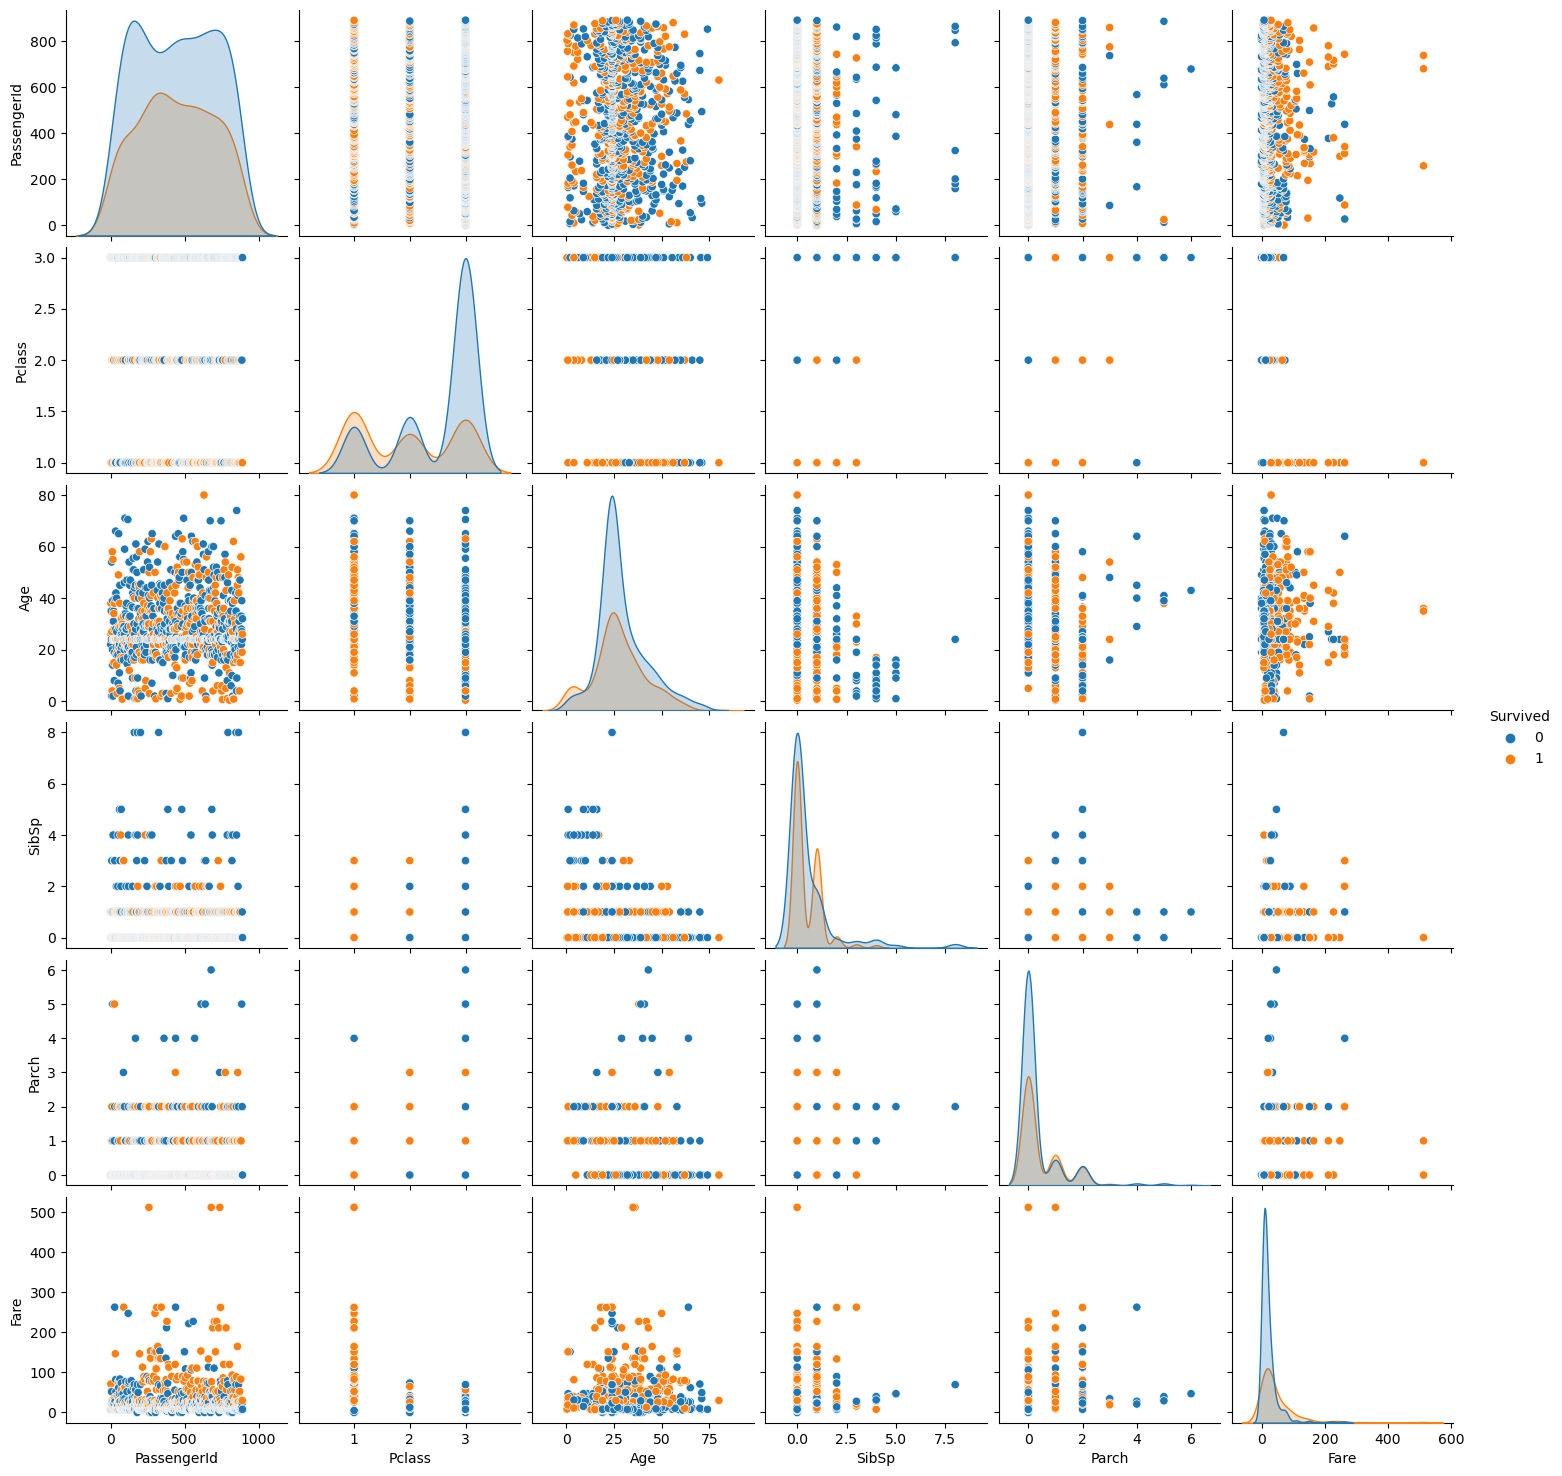

In [8]:
sns.pairplot(tnc_df, hue='Survived')

<Axes: >

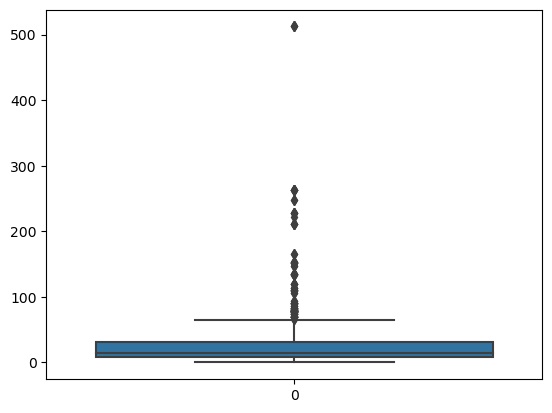

In [9]:
# Checking the outliers of the fare attribute
sns.boxplot(tnc_df['Fare'])

In [10]:
manipulated_df = tnc_df[tnc_df['Fare']>100]

In [11]:
manipulated_df.shape

(53, 12)

In [12]:
titanic_df = tnc_df[tnc_df['Fare']<100]

In [13]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [14]:
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)

In [15]:
titanic_df['Age'] = titanic_df['Age'].astype('float')

In [16]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  838 non-null    int64  
 1   Pclass    838 non-null    int64  
 2   Sex       838 non-null    object 
 3   Age       838 non-null    float64
 4   SibSp     838 non-null    int64  
 5   Parch     838 non-null    int64  
 6   Fare      838 non-null    float64
 7   Cabin     838 non-null    object 
 8   Embarked  838 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [17]:
X_features = list(titanic_df.columns)
X_features.remove('Survived')
X_features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

### Encoding Categorical Features

In [18]:
# Convert categorical features to numerical features
## Using dummy variables aka One Hot Encoding (OHE)
encoded_titanic_df = pd.get_dummies(titanic_df[X_features], drop_first=True)

In [19]:
encoded_titanic_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B50,Cabin_B51 B53 B55,Cabin_B69,Cabin_B71,Cabin_B73,Cabin_B77,Cabin_B79,Cabin_B82 B84,Cabin_B86,Cabin_B94,Cabin_B96 B98,Cabin_C101,Cabin_C103,Cabin_C104,Cabin_C106,Cabin_C110,Cabin_C111,Cabin_C118,Cabin_C123,Cabin_C124,Cabin_C126,Cabin_C128,Cabin_C148,Cabin_C2,Cabin_C30,Cabin_C46,Cabin_C47,Cabin_C49,Cabin_C50,Cabin_C52,Cabin_C54,Cabin_C78,Cabin_C83,Cabin_C85,Cabin_C87,Cabin_C90,Cabin_C92,Cabin_C93,Cabin_D,Cabin_D10 D12,Cabin_D11,Cabin_D15,Cabin_D17,Cabin_D19,Cabin_D20,Cabin_D21,Cabin_D26,Cabin_D28,Cabin_D30,Cabin_D33,Cabin_D35,Cabin_D37,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E36,Cabin_E38,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Set X(features) and y(outcome) before proceeding to build the model

In [20]:
import statsmodels.api as sm

In [21]:
y = titanic_df['Survived']
X = sm.add_constant(encoded_titanic_df)

### Splitting  Dataset into Training and Test Sets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building Logistic Regression Model

- Will fit the model using Logit and pass training sets X_train and y_train as parameters.

In [24]:
logit = sm.GLM(y,X, family=sm.families.Binomial(link=sm.families.links.logit()))
logit_model = logit.fit()

In [25]:
# Model Summary
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Generalized linear model
===============================================================================
Model:                    GLM                   AIC:                 858.9159  
Link Function:            logit                 BIC:                 -4171.3759
Dependent Variable:       Survived              Log-Likelihood:      -300.46   
Date:                     2023-05-23 12:00      LL-Null:             -548.32   
No. Observations:         838                   Deviance:            600.92    
Df Model:                 128                   Pearson chi2:        718.      
Df Residuals:             709                   Scale:               1.0000    
Method:                   IRLS                                                 
-------------------------------------------------------------------------------
                   Coef.     Std.Err.     z     P>|z|     [0.025       0.975]  
-------------------------------------------------------------------------------
const             -20.9603 215996.6731  -0.0001 0.9999 -423366.6604 423324.7398
Pclass             -0.7993      0.2178  -3.6700 0.0002      -1.2262     -0.3724
Age                -0.0473      0.0103  -4.5799 0.0000      -0.0675     -0.0270
SibSp              -0.5143      0.1377  -3.7354 0.0002      -0.7841     -0.2444
Parch              -0.0805      0.1345  -0.5986 0.5494      -0.3442      0.1831
Fare                0.0155      0.0104   1.4865 0.1371      -0.0049      0.0359
Sex_male           -2.7263      0.2280 -11.9550 0.0000      -3.1732     -2.2793
Cabin_A14          -0.4402 305467.9384  -0.0000 1.0000 -598706.5979 598705.7175
Cabin_A16          49.4952 305467.5948   0.0002 0.9999 -598655.9891 598754.9795
Cabin_A19          -0.0378 305467.7715  -0.0000 1.0000 -598705.8684 598705.7927
Cabin_A20          52.0006 305467.5948   0.0002 0.9999 -598653.4838 598757.4849
Cabin_A23          53.6786 305467.5948   0.0002 0.9999 -598651.8058 598759.1629
Cabin_A24          -0.0862 305467.3017  -0.0000 1.0000 -598704.9959 598704.8236
Cabin_A26          52.1487 305467.5948   0.0002 0.9999 -598653.3356 598757.6331
Cabin_A31          51.4623 305467.5949   0.0002 0.9999 -598654.0221 598756.9467
Cabin_A32          -0.4093 305467.7722  -0.0000 1.0000 -598706.2412 598705.4227
Cabin_A34          49.4458 305467.5948   0.0002 0.9999 -598656.0385 598754.9301
Cabin_A36           1.0733 305467.5565   0.0000 1.0000 -598704.3358 598706.4824
Cabin_A5            1.7385 305467.8446   0.0000 1.0000 -598704.2354 598707.7124
Cabin_A6           51.1363 305467.5948   0.0002 0.9999 -598654.3481 598756.6206
Cabin_A7            1.0909 305467.8033   0.0000 1.0000 -598704.8019 598706.9838
Cabin_B102          0.3645 305467.7853   0.0000 1.0000 -598705.4932 598706.2223
Cabin_B18          48.0564 261352.7023   0.0002 0.9999 -512193.8274 512289.9402
Cabin_B19           1.5945 305467.0576   0.0000 1.0000 -598702.8369 598706.0258
Cabin_B20          50.3426 247840.8035   0.0002 0.9998 -485708.7061 485809.3913
Cabin_B22          25.2169 215996.6731   0.0001 0.9999 -423320.4832 423370.9170
Cabin_B28          48.8578 262133.0392   0.0002 0.9999 -513722.4582 513820.1738
Cabin_B30           1.1126 305467.8445   0.0000 1.0000 -598704.8611 598707.0863
Cabin_B35          47.3873 264542.0707   0.0002 0.9999 -518445.5437 518540.3182
Cabin_B37           1.2009 305467.8842   0.0000 1.0000 -598704.8506 598707.2523
Cabin_B38           0.9460 305467.9384   0.0000 1.0000 -598705.2117 598707.1036
Cabin_B39          47.7602 305467.5949   0.0002 0.9999 -598657.7241 598753.2446
Cabin_B4           48.9758 305467.5949   0.0002 0.9999 -598656.5086 598754.4602
Cabin_B41          52.2562 305467.5949   0.0002 0.9999 -598653.2281 598757.7406
Cabin_B42          48.0698 305467.5949   0.0002 0.9999 -598657.4145 598753.5542
Cabin_B49          49.2913 249531.1039   0.0002 0.9998 -489022.6853 489121.2679
Cabin_B50          51.0920 305467.5949   0.0002 0.9999

#### Model Diagnostics

In [26]:
# definig the get_significant_var()
# returns the list of significant variables with corressponding p-value < 0.05
def get_significant_vars(lm):
    
    # store the p-value and corressponding column names in a dataframe
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals','vars']
    
    # Filter the column name where p-value is less than 0.05
    
    return list(var_p_vals_df[var_p_vals_df.pvals<= 0.05]['vars'])

In [27]:
# Invoking the method get_significant_vars and passing logit_model
significant_vars = get_significant_vars(logit_model)
significant_vars

['Pclass', 'Age', 'SibSp', 'Sex_male']

In [28]:
# Now building a logistic regression using only the significant variables
final_logit = sm.Logit(y_train, 
                      sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.450133
         Iterations 6


In [29]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.317     
Dependent Variable: Survived         AIC:              613.1784  
Date:               2023-05-23 12:00 BIC:              635.7148  
No. Observations:   670              Log-Likelihood:   -301.59   
Df Model:           4                LL-Null:          -441.55   
Df Residuals:       665              LLR p-value:      2.3088e-59
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         5.3670    0.5707    9.4049  0.0000   4.2485   6.4855
Pclass       -1.2220    0.1434   -8.5193  0.0000  -1.5031  -0.9408
Age          -0.0411    0.0090   -4.5395  0.0000  -0.0588  -0.0233
SibSp        -0.4800    0.1302   -3.6855  0.0002  -0.7352  -0.2247
Sex_male     -2.7529    0.2282  -12.0611  0.0000  -3.2003  -2.3056
=================================================================

"""

### Predicting on Test Dataset

In [30]:
y_pred_df = pd.DataFrame({'actual':y_test,
                         'predicted_prob':final_logit.predict(
                         sm.add_constant(X_test[significant_vars]))})

In [31]:
# Printing the predictions of few test samples randomly using the sample method Dataframe
y_pred_df.sample(15, random_state=42)

,actual,predicted_prob
635,1,0.854806
41,0,0.791484
477,0,0.061620
567,0,0.624748
658,0,0.315458
465,0,0.068313
885,0,0.524718
887,1,0.966576
5,0,0.115293
626,0,0.102345


- Assume that the cut-off probability is 0.5.
- All the observations with predicted probability of more than 0.5 is predicted as survived and rest all as not survived

In [32]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x>0.5 else 0)

In [33]:
y_pred_df.sample(15, random_state=42)

,actual,predicted_prob,predicted
635,1,0.854806,1
41,0,0.791484,1
477,0,0.061620,0
567,0,0.624748,1
658,0,0.315458,0
465,0,0.068313,0
885,0,0.524718,1
887,1,0.966576,1
5,0,0.115293,0
626,0,0.102345,0


#### Creating a Confusion Matrix

In [34]:
from sklearn import metrics

In [35]:
def draw_cm(actual, predicted):
    
    ## Create
    cm = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt=' .2f',
               xticklabels=['Survived','Not Survived'],
               yticklabels=['Survived','Not Survived'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

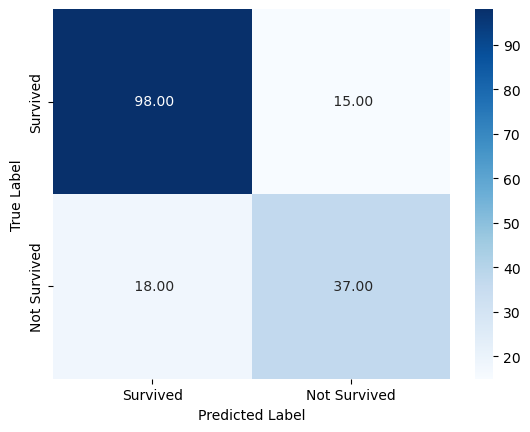

In [36]:
## Invoke draw_cm() method to plot the results of our model predictions
draw_cm(y_pred_df.actual,
       y_pred_df.predicted)

- The columns represent the predicted label (class) and the rows represent the actual label (class)
- Here 98 has been classified correctly as 'Survived'  and rest 15 classified wrongly as 'Not Survived', when the cut-off probability is 0.5.
- Left top quadrant represents the actual 'Survived' and is correctly classified as 'Survived'. This is True Positives (TP)
- Left down quadrant represents actual 'Not Survived' and is wrongly classified as 'Survived'. This is False Positive(FP)
- Right top quadrant represents actual 'Survived' and incorrectly classified as 'Not Survived'. This is False Negative(FN)
- Right down quadrant represents actual 'Not Survived' as is correctly classified as 'Not Survivred'. This True Negative (TN)

In [37]:
print(metrics.classification_report(y_pred_df.actual,y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       113
           1       0.71      0.67      0.69        55

    accuracy                           0.80       168
   macro avg       0.78      0.77      0.77       168
weighted avg       0.80      0.80      0.80       168



The model is very good in indentifying Not Survived (y=0)

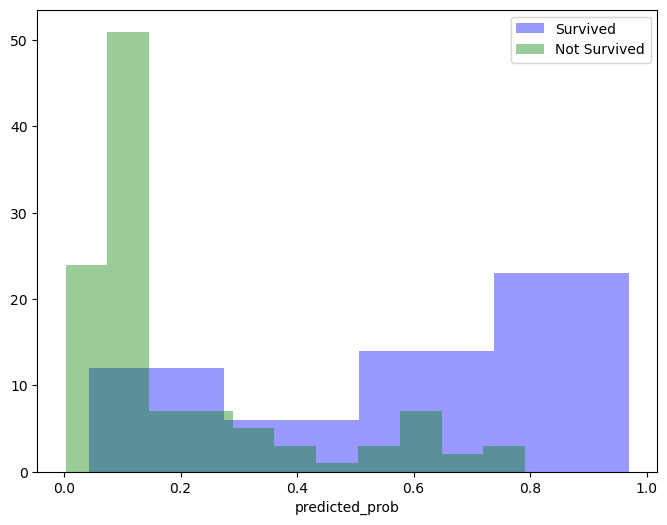

In [38]:
# plot the distibutions of predicted prob values for Not Survived and Survived.
plt.figure(figsize=(8,6))
# plotiing distributions for predicted prob values for Survived
sns.distplot(y_pred_df[y_pred_df.actual==1]['predicted_prob'], kde=False, color='b', label='Survived')

# plotting the distribution for predicted prob values for Not Survived
sns.distplot(y_pred_df[y_pred_df.actual==0]['predicted_prob'], kde=False, color='g', label='Not Survived')

plt.legend()
plt.show()

### Receiver Operating Charecterstics (ROC) & Area Under the Curve (AUC)

ROC is a curve plot between Sensitivity (True positive Rate) on the vertical axis and 1 - Specificity (False Positive Rate) on the horizontal axis

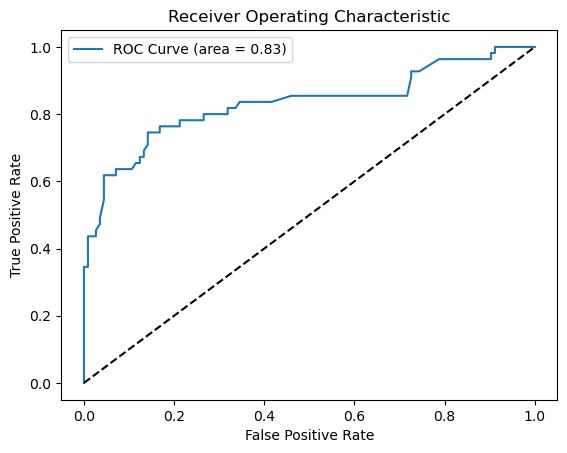

In [39]:
fpr,tpr,threshold = metrics.roc_curve(y_pred_df.actual, y_pred_df.predicted_prob)
auc = metrics.roc_auc_score(y_pred_df.actual, y_pred_df.predicted_prob)
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

- AUC is 0.83 which implies the model is fairly good.

In [40]:
auc_score = metrics.roc_auc_score(y_pred_df.actual, y_pred_df.predicted_prob)
round(float(auc_score),2)

0.83

### Finding Optimal Classification Cut-Off

#### 1. Youden's Index (J-statistic)

In [41]:
tpr_fpr = pd.DataFrame({'tpr':tpr,
                       'fpr':fpr,
                       'threshold':threshold,})
tpr_fpr.head()

,tpr,fpr,threshold
0,0.000000,0.0,1.970337
1,0.018182,0.0,0.970337
2,0.163636,0.0,0.886990
3,0.200000,0.0,0.874036
4,0.345455,0.0,0.804719


In [42]:
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values('diff', ascending=False)[0:7]

,tpr,fpr,threshold,diff
25,0.745455,0.141593,0.395491,0.603862
27,0.763636,0.168142,0.343229,0.595495
28,0.763636,0.185841,0.315458,0.577796
26,0.745455,0.168142,0.361392,0.577313
13,0.618182,0.044248,0.643803,0.573934
30,0.781818,0.212389,0.285520,0.569429
24,0.709091,0.141593,0.437551,0.567498


- From the above result the optimal cut-off is 0.39.

In [43]:
# Observations beyond 0.39 predicted probability as Survived
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.39 else 0)

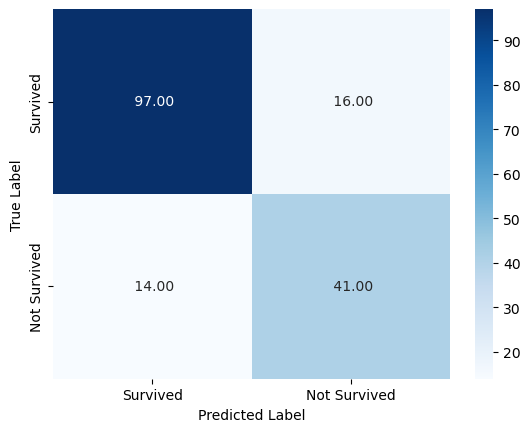

In [44]:
# Draw the new confusion matrix
# Invoke the draw_cm method
draw_cm(y_pred_df.actual, y_pred_df.predicted_new)

In [45]:
# Report of cut-off probability 0.39
print(metrics.classification_report(y_pred_df.actual, y_pred_df.predicted_new))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       113
           1       0.72      0.75      0.73        55

    accuracy                           0.82       168
   macro avg       0.80      0.80      0.80       168
weighted avg       0.82      0.82      0.82       168



- The f1-score for Survived (y=1) has improved to 0.73 from 0.69

### Based on the Analysis, the factors that had the greatest impact on survival were :
- Being Female
- Being in the age criteria of below 30
- Being in a higher passenger class
- Having fewer siblings/spouse onboard
- Having one or two parents/children onboard

# Decision Tree Learning

In [46]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B96 B98,S


In [47]:
titanic_df['Cabin'] = titanic_df['Cabin'].str.replace(" ","")

### Splitting the Dataset

In [48]:
X_features = list(titanic_df.columns)
X_features

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked']

In [49]:
X_features.remove('Survived')

In [50]:
encoded_titanic_df = pd.get_dummies(titanic_df[X_features], drop_first=True)

In [51]:
y = titanic_df['Survived']
X = encoded_titanic_df

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Building Decision Tree Classifier using Gini Criteria

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
titanic_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [57]:
titanic_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

#### Measuring Test Accuracy

In [58]:
tree_predict = titanic_tree.predict(X_test)
metrics.roc_auc_score(y_test, tree_predict)

0.7876910699919549

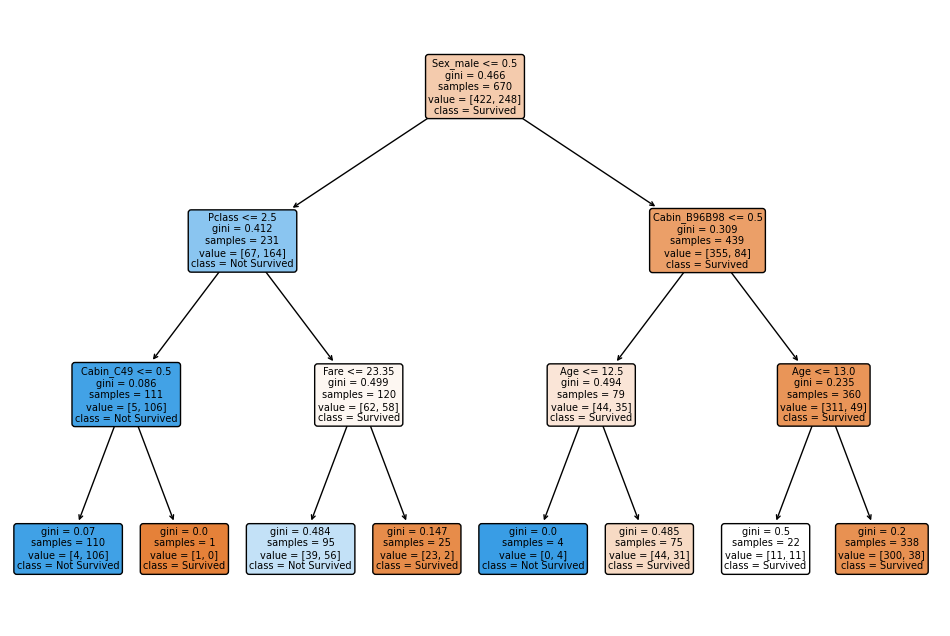

In [59]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(titanic_tree, feature_names=X_train.columns, class_names=['Survived', 'Not Survived'], filled=True, rounded=True)
plt.show()

- At the top node, there are 670 samples of which 422 are Survived and 248 are Not Survived. The corressponding Gini Index is 0.466.
- Sex_Male is the most important feature for splitting Survived and Not Survived in the dataset when copmared to other features and hence chosen as the top splitting criteria.

In [60]:
# Gini Impurity for the top node
gini_node_1 = 1 - pow(422/670,2) - pow(248/670,2)
print(round(gini_node_1,4))

0.4663


### Building Decision Tree using Entropy Criteria

In [61]:
clf_tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [62]:
clf_tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [63]:
tree_entropy_predict = clf_tree_entropy.predict(X_test)

In [64]:
metrics.roc_auc_score(y_test, tree_entropy_predict)

0.7786001609010459

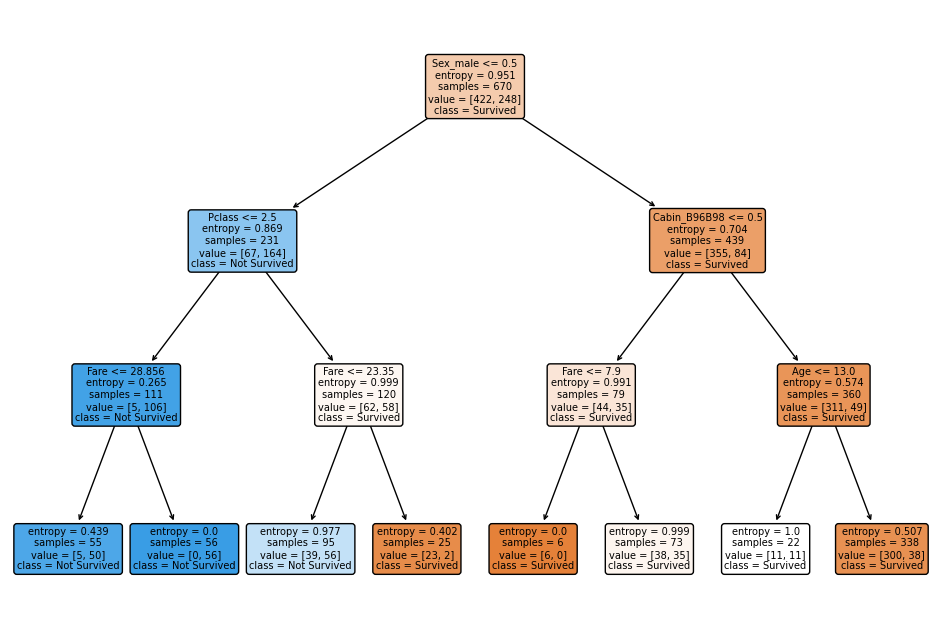

In [65]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_tree_entropy, feature_names=X_train.columns, class_names=['Survived', 'Not Survived'], filled=True, rounded=True)
plt.show()

- The rules generated at the top two level nodes are same as the rules generated by decision tree built using Gini index. The rules at third level nodes are different.

In [66]:
# Calculating Entropy
import math
entropy_node_1 = -(420/670)*math.log2(420/670) - (248/670)*math.log2(248/670)
print(round(entropy_node_1,2))

0.95


### Finding Optimal Criteria and Max-Depth

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
tuned_parameters = [{'criterion':['gini','entropy'],
                    'max_depth':range(2,10)}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,tuned_parameters,
                  cv=10, scoring='roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [69]:
clf.best_score_

0.8546785714285715

In [70]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [71]:
clf_tree_entropy_2 = DecisionTreeClassifier(criterion='entropy',  max_depth=4)

In [72]:
clf_tree_entropy_2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [73]:
tree_entropy_predict_2 = clf_tree_entropy_2.predict(X_test)

In [74]:
metrics.roc_auc_score(y_test, tree_entropy_predict_2)

0.7970233306516492

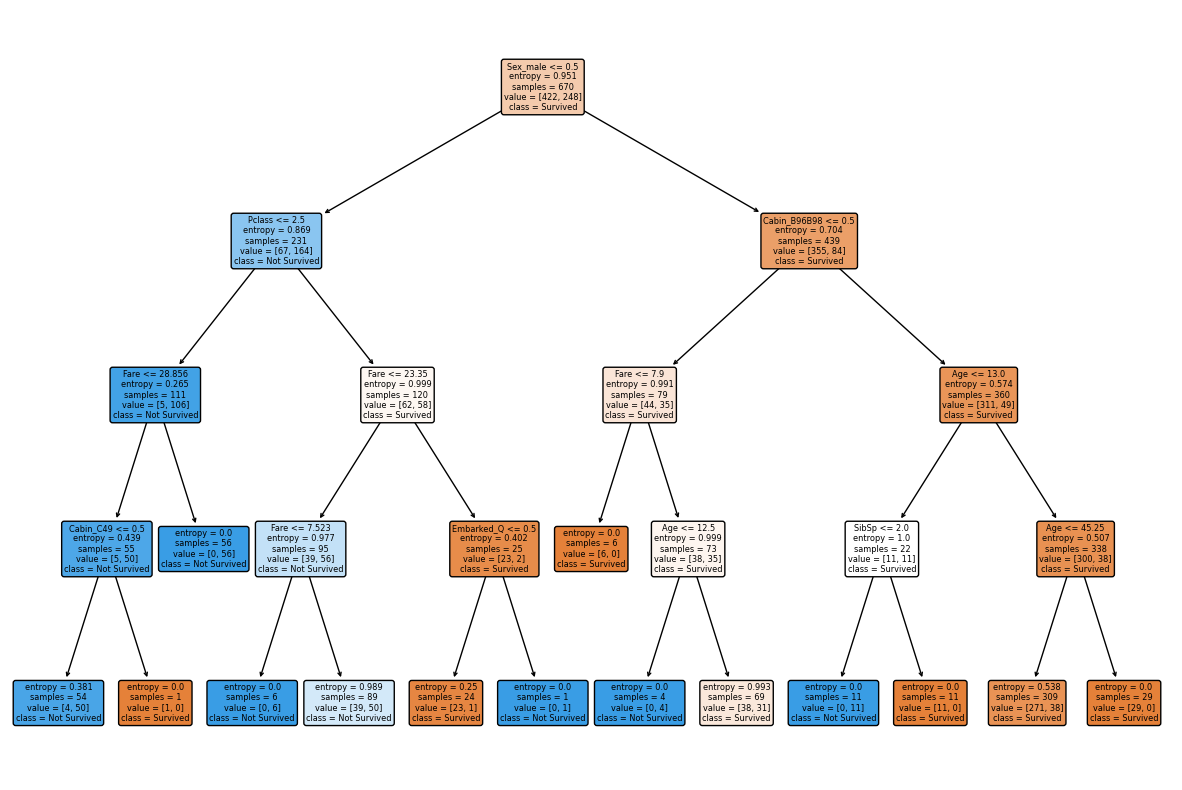

In [75]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf_tree_entropy_2, feature_names=X_train.columns, class_names=['Survived', 'Not Survived'], filled=True, rounded=True)
plt.show()

## Random Forest

### Building Random Forest Model

In [76]:
# Importing random forest classifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [77]:
# Initializing the Random Forest Classifier with max_depth and n_estimators
random_clf = RandomForestClassifier(max_depth=10, n_estimators=10)
random_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=10)

In [78]:
clf_tree_random = random_clf.predict(X_test)

In [79]:
metrics.roc_auc_score(y_test, clf_tree_random)

0.7734513274336283

#### Grid Search for Optimal Parameters

In [80]:
## Configuring parameters and values for searched
tuned_parameters = [{'max_depth':[10,15],
                    'n_estimators':[10,20],
                    'max_features':['sqrt',0.2]}]
# Initializing the RF classifier
radm_clf = RandomForestClassifier()

## Configuring search with the tunable parameters
clf = GridSearchCV(radm_clf,
                  tuned_parameters,
                  cv=5,
                  scoring='roc_auc')

# Fittinf training set
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15], 'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [81]:
clf.best_score_

0.8663983593437374

In [82]:
clf.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 20}

- The best accuracy of 0.865 AUC score is given by a random forest with 10 decision trees (estimators), maximum 20% of total number of features and max depth is 10

### Building Final Model with Optimal Parameter Values

In [83]:
## Initializing the Random Forest model with the Optima Values
radm_clf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=0.2)

## Fitting the model with the training set
radm_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.2, n_estimators=10)

In [84]:
radm_clf_tree = radm_clf.predict(X_test)

In [85]:
metrics.roc_auc_score(y_test, radm_clf_tree)

0.7599356395816573

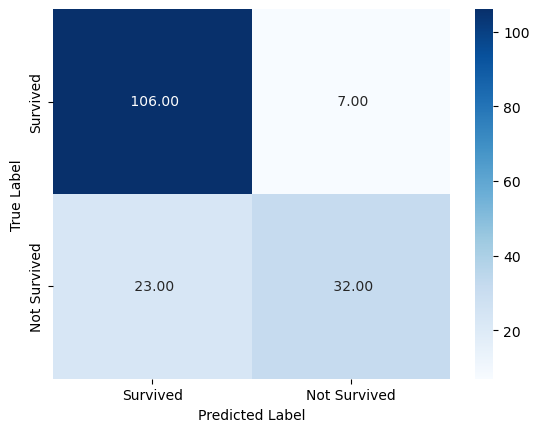

In [86]:
draw_cm(y_test,radm_clf_tree)

- The model can detect 104 of 113 cases that they have survived

In [87]:
print(metrics.classification_report(y_test,radm_clf_tree))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       113
           1       0.82      0.58      0.68        55

    accuracy                           0.82       168
   macro avg       0.82      0.76      0.78       168
weighted avg       0.82      0.82      0.81       168



#### Finding Important Features

In [88]:
# Create a dataframe to store the features and their corressponding importance
feature_rank = pd.DataFrame({'feature':X_train.columns,
                            'importance':radm_clf.feature_importances_})

## Sorting the features based on their importance with most important feature at top
feature_rank = feature_rank.sort_values('importance', ascending=False)

In [89]:
feature_rank['cumsum'] = feature_rank.importance.cumsum()*100

In [90]:
feature_rank.head(10)

,feature,importance,cumsum
5,Sex_male,0.313094,31.309449
1,Age,0.182296,49.539010
4,Fare,0.140781,63.617073
0,Pclass,0.094409,73.057932
45,Cabin_B96B98,0.063467,79.404679
3,Parch,0.054256,84.830297
2,SibSp,0.041406,88.970889
127,Embarked_S,0.029920,91.962841
126,Embarked_Q,0.010191,92.981962
62,Cabin_C49,0.008383,93.820227
